In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../mnist-data/", one_hot=True)

Extracting ../mnist-data/train-images-idx3-ubyte.gz
Extracting ../mnist-data/train-labels-idx1-ubyte.gz
Extracting ../mnist-data/t10k-images-idx3-ubyte.gz
Extracting ../mnist-data/t10k-labels-idx1-ubyte.gz


In [4]:
mnist.train.images.shape

(55000, 784)

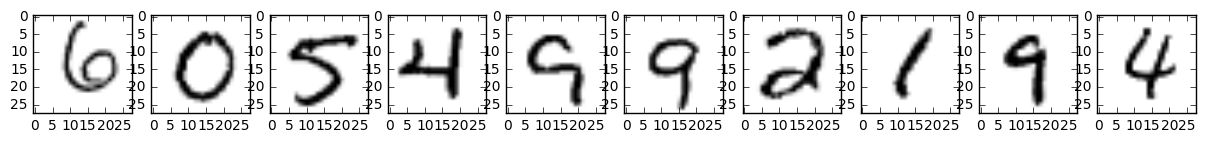

In [5]:
plt.figure(figsize=(15,5))
for i in list(range(10)):
    plt.subplot(1, 10, i+1)
    pixels = mnist.test.images[i+100]
    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='gray_r')
plt.show()

In [6]:
import tensorflow as tf

In [7]:
# Set parameters
learning_rate = 0.01
training_iteration = 10
batch_size = 250

FLAGS = None

In [8]:
# TF graph input
x = tf.placeholder('float', [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder('float', [None, 10]) # 0-9 digits recognition => 10 classes

In [9]:
# Set model weights
W = tf.Variable(tf.zeros([784, 10]), name='W')
b = tf.Variable(tf.zeros([10]), name='b')

In [10]:
with tf.name_scope("Wx_b") as scope:
    # Construct a linear model
    y_hat = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax
    
    # Add summary ops to collect data
    tf.histogram_summary("weights", W)
    tf.histogram_summary("biases", b)

In [11]:
# More name scopes will clean up graph representation
with tf.name_scope("cost_function") as scope:
    # Minimize error using cross entropy
    # Cross entropy
    cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y_hat,y))
    # Create a summary to monitor the cost function
    tf.scalar_summary("cost_function", cost_function)

In [12]:
with tf.name_scope("train") as scope:
    # Gradient descent
    optimizer = tf.train.AdamOptimizer().minimize(cost_function)

In [13]:
# Initializing the variables
init = tf.global_variables_initializer()

# Merge all summaries into a single operator
merged_summary_op = tf.merge_all_summaries()

In [14]:
# Launch the graph
sess = tf.InteractiveSession()

# Logs and graph for tensorboard
summary_writer = tf.train.SummaryWriter('./tensorboard', graph=sess.graph)

# Init the session
sess.run(init)

In [15]:
# Training cycle
for iteration in range(training_iteration):
    avg_cost = 0.
    total_batch = int(mnist.train.num_examples/batch_size)
    # Loop over all batches
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        # Fit training using batch data
        sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys})
        # Compute the average loss
        avg_cost += sess.run(cost_function, feed_dict={x: batch_xs, y: batch_ys})/total_batch

        # Write logs for each iteration
        summary_str = sess.run(merged_summary_op, feed_dict={x: batch_xs, y: batch_ys})
        summary_writer.add_summary(summary_str, iteration*total_batch + i)
        
    # Display logs per iteration step
    print("Iteration:", '%02d' % iteration, "cost=", "{:.9f}".format(avg_cost))


Iteration: 00 cost= 1.857927603
Iteration: 01 cost= 1.648864066
Iteration: 02 cost= 1.611322617
Iteration: 03 cost= 1.593678046
Iteration: 04 cost= 1.582898428
Iteration: 05 cost= 1.575393111
Iteration: 06 cost= 1.569732786
Iteration: 07 cost= 1.565371287
Iteration: 08 cost= 1.561801960
Iteration: 09 cost= 1.558820099


In [16]:
# Test the model
predictions = tf.equal(tf.argmax(y_hat, 1), tf.argmax(y, 1))

# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(predictions, "float"))
print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))


Accuracy: 0.9218


In [17]:
# test item #100 is a six
pixels = mnist.test.images[100]

#predict
result = sess.run(y_hat, feed_dict={x:[pixels]})
dict(zip(range(10), result[0]))

{0: 0.00011263107,
 1: 7.5380726e-06,
 2: 0.0034674823,
 3: 2.1145564e-05,
 4: 0.000130314,
 5: 9.2624866e-08,
 6: 0.99592811,
 7: 4.3597652e-06,
 8: 0.0002779878,
 9: 5.0333558e-05}

In [18]:
def test_render(pixels, result, truth):
    #pixels, result and truth are np vectors
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='gray_r')

    plt.subplot(1, 2, 2)
    
    #index, witdh
    ind = np.arange(len(result))
    width = 0.4

    plt.barh(ind,result, width, color='gray')
    plt.barh(ind+width,truth,width, color='green')
    plt.yticks(ind+width, range(10))
    plt.margins(y=0)

    plt.show()

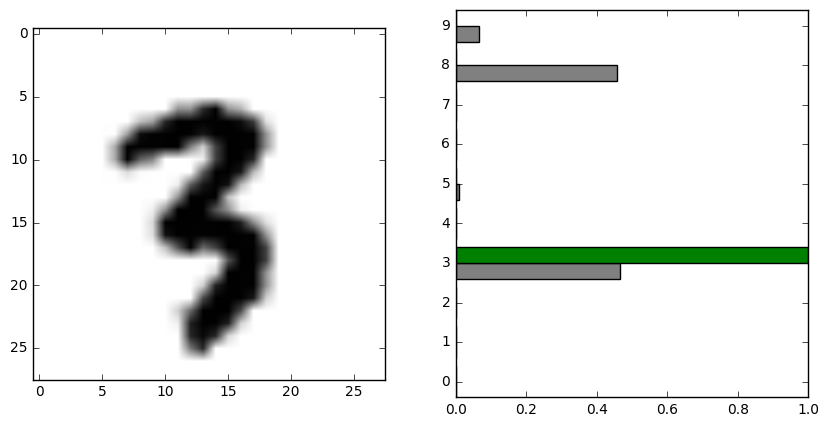

In [19]:
import random
i = random.randint(0,mnist.test.images.shape[0])

pixels = mnist.test.images[i]
truth  = mnist.test.labels[i]
result = sess.run(y_hat, feed_dict={x:[pixels]})[0]

test_render(pixels, result, truth)

In [20]:
# Close the Session when we're done.
sess.close()